
Descripción estadística de las columnas numéricas:
           Numero                  Fecha_Entrada   Sueldo_Bruto          AFP  \
count  344.000000                            343     344.000000   344.000000   
mean   172.500000  2020-05-24 01:07:10.320699648   35003.845930  1004.610436   
min      1.000000            1998-01-01 00:00:00    3000.000000    86.100000   
25%     86.750000            2020-11-01 00:00:00   25000.000000   717.500000   
50%    172.500000            2022-02-01 00:00:00   25000.000000   717.500000   
75%    258.250000            2023-05-09 00:00:00   31625.000000   907.637500   
max    344.000000            2024-06-01 00:00:00  300000.000000  8610.000000   
std     99.448479                            NaN   31890.642005   915.261409   

                ISR          SFS  Otros_Descuentos  Total_Descuentos  \
count    344.000000   344.000000        344.000000        344.000000   
mean    1454.986483  1051.274215        457.608721       3968.479855   
min        

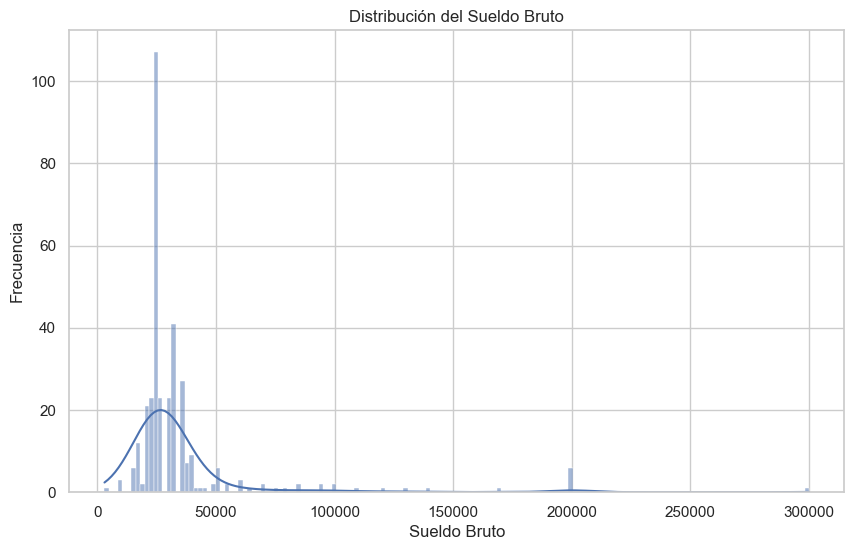

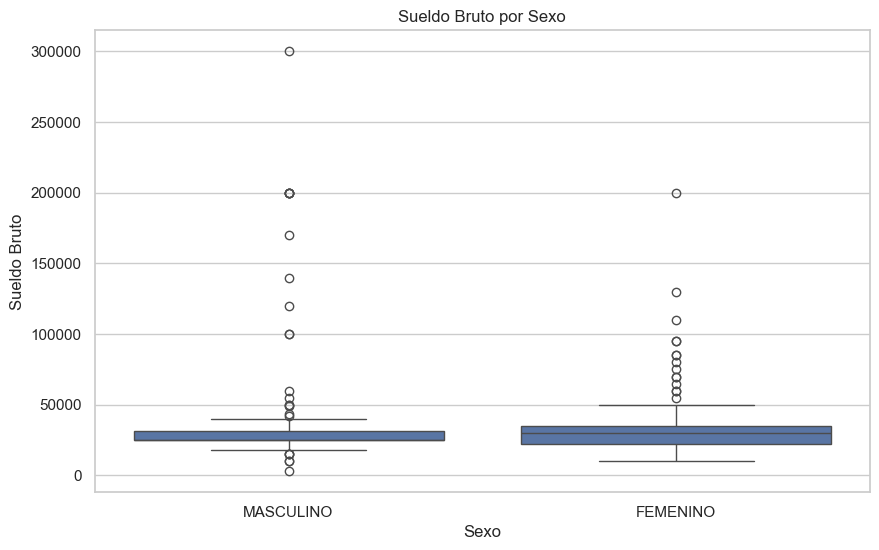

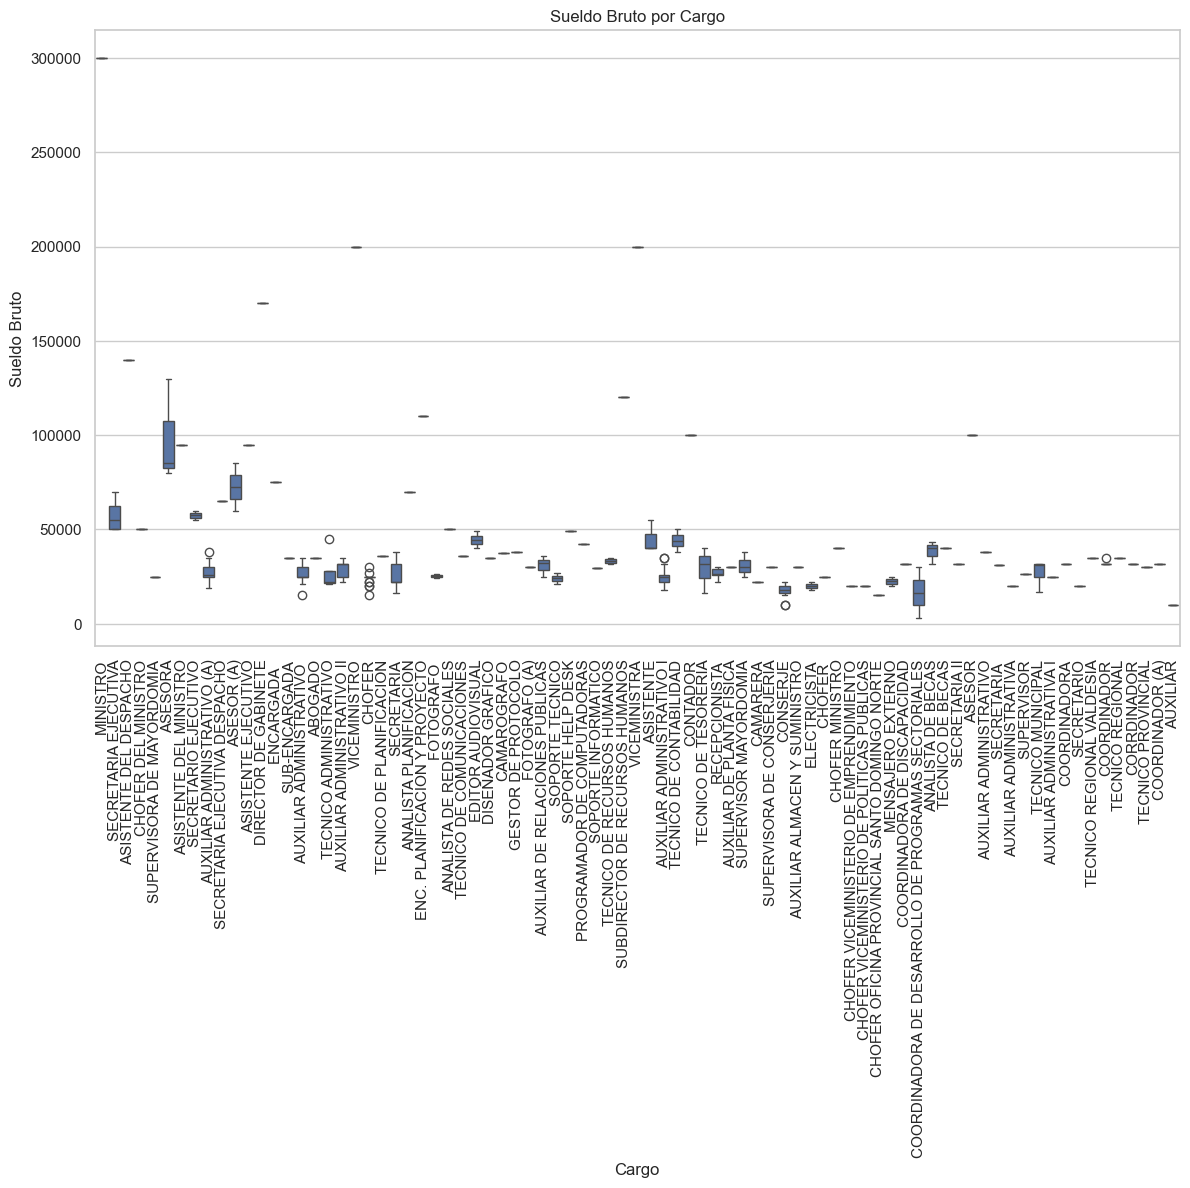

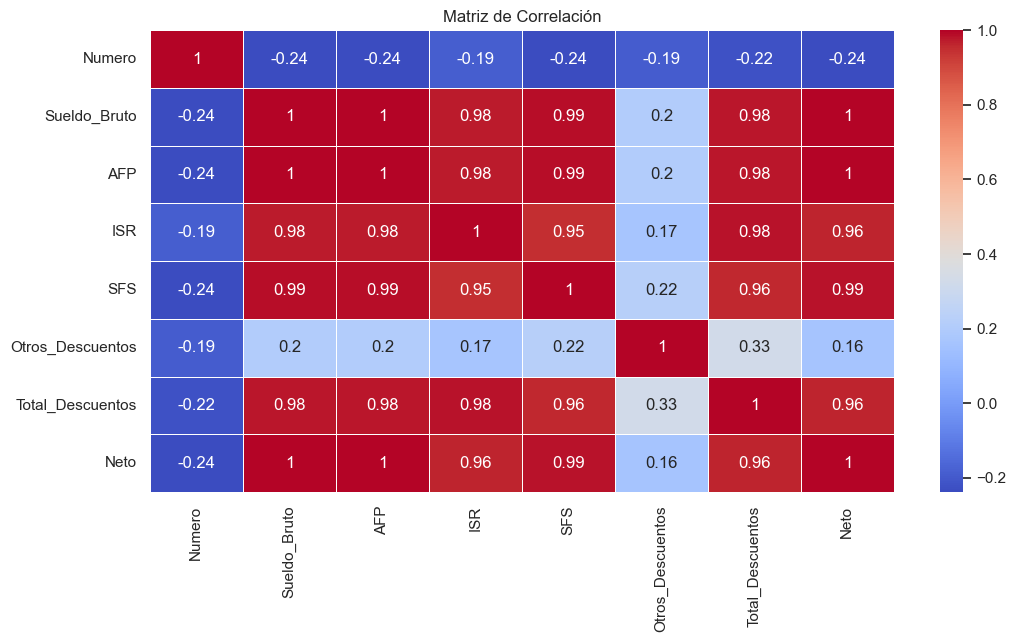


Hallazgos importantes:
1. El sueldo promedio general es 35003.85
2. El sueldo promedio de los hombres es 35032.49
3. El sueldo promedio de las mujeres es 34957.84
4. El cargo con el mayor sueldo promedio es 'MINISTRO' con un sueldo promedio de 300000.00
5. El cargo con el menor sueldo promedio es 'AUXILIAR' con un sueldo promedio de 10000.00


C:\Users\bourd\AppData\Local\Temp\ipykernel_1288\3871742272.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"2. El sueldo promedio de los hombres es {sueldo_promedio_por_sexo[1]:.2f}")
C:\Users\bourd\AppData\Local\Temp\ipykernel_1288\3871742272.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"3. El sueldo promedio de las mujeres es {sueldo_promedio_por_sexo[0]:.2f}")


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
ruta_clean_excel = '../../data/clean/MJ-JUNIO-2024_clean.xlsx'
df_clean = pd.read_excel(ruta_clean_excel)

# Obtener estadísticas básicas de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(df_clean.describe())

# Calcular estadísticas adicionales
sueldo_promedio = df_clean['Sueldo_Bruto'].mean()
sueldo_mediana = df_clean['Sueldo_Bruto'].median()
sueldo_minimo = df_clean['Sueldo_Bruto'].min()
sueldo_maximo = df_clean['Sueldo_Bruto'].max()
sueldo_desviacion_estandar = df_clean['Sueldo_Bruto'].std()

print(f"\nSueldo Bruto Promedio: {sueldo_promedio}")
print(f"Sueldo Bruto Mediana: {sueldo_mediana}")
print(f"Sueldo Bruto Mínimo: {sueldo_minimo}")
print(f"Sueldo Bruto Máximo: {sueldo_maximo}")
print(f"Sueldo Bruto Desviación Estándar: {sueldo_desviacion_estandar}")

# Sueldo promedio por Cargo
sueldo_promedio_por_cargo = df_clean.groupby('Cargo')['Sueldo_Bruto'].mean()
print("\nSueldo Bruto Promedio por Cargo:")
print(sueldo_promedio_por_cargo)

# Sueldo promedio por Sexo
sueldo_promedio_por_sexo = df_clean.groupby('Sexo')['Sueldo_Bruto'].mean()
print("\nSueldo Bruto Promedio por Sexo:")
print(sueldo_promedio_por_sexo)

# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Sueldo_Bruto'], kde=True)
plt.title('Distribución del Sueldo Bruto')
plt.xlabel('Sueldo Bruto')
plt.ylabel('Frecuencia')
plt.show()

# Análisis de distribuciones en conjunto con otras variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sexo', y='Sueldo_Bruto', data=df_clean)
plt.title('Sueldo Bruto por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Sueldo Bruto')
plt.show()

# Sueldo Bruto por Cargo
plt.figure(figsize=(14, 8))
sns.boxplot(x='Cargo', y='Sueldo_Bruto', data=df_clean)
plt.xticks(rotation=90)
plt.title('Sueldo Bruto por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Sueldo Bruto')
plt.show()

# Matriz de correlación utilizando solo las columnas numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Presentación de hallazgos importantes
print("\nHallazgos importantes:")
print(f"1. El sueldo promedio general es {sueldo_promedio:.2f}")
print(f"2. El sueldo promedio de los hombres es {sueldo_promedio_por_sexo[1]:.2f}")
print(f"3. El sueldo promedio de las mujeres es {sueldo_promedio_por_sexo[0]:.2f}")
cargo_con_mayor_sueldo = sueldo_promedio_por_cargo.idxmax()
cargo_con_menor_sueldo = sueldo_promedio_por_cargo.idxmin()
print(f"4. El cargo con el mayor sueldo promedio es '{cargo_con_mayor_sueldo}' con un sueldo promedio de {sueldo_promedio_por_cargo.max():.2f}")
print(f"5. El cargo con el menor sueldo promedio es '{cargo_con_menor_sueldo}' con un sueldo promedio de {sueldo_promedio_por_cargo.min():.2f}")
